# What drives the price of a car?

![](images/kurt.jpeg)

In [352]:
# Importing all the neccessary 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [353]:
#Data problem definition
# The goal of this problem is to develop a predictive model that will correctly predict the prices of used cars based on various features
# such as Odometer readings, Size of the cars, make/model of the car and so on. 


In [354]:
# We would need to employ various Regression models to identify petterns, imporatnat features that contributes to the price determinatio
# based on the historic data and accurately predict any future car sale prices.

In [355]:
# In summary, the objective is to create a robust predictive model that accurately predicts the prices of used cars
# and identified the modt significant factires cintributing to their valuation.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [356]:
# Data Collection --> This phase is done with loading vehicle.csv data
vehicleDf = pd.read_csv("data/vehicles.csv")
# Data Visualization

In [357]:
# Data Description
vehicleDf.info()
# The cursory overview of the data
# Total 426880 Samples and 18 Features
# Categorical data - region, model, manufacturer, condition, 
# cylinders,fuel, title_status, transmission, VIN, drive, size
# type, paint_color, state
# Numerical data - id, price, year, float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [358]:
#Undertsnad the mean and Standaed deviation of numerical data
vehicleDf.describe()
#For year the mean and spread seems lower which seem correct.
# We can defintely see that price as well as odomoeter has a large
# standard deviation telling us the values are spread over large numbers.

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [359]:
# Data Quality
vehicleDf.head()
#Looks like we have a lot of NaNs present in the data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [360]:
#Let's see how much missing values are present per feature.
missingVals = vehicleDf.isnull().sum()
print(f"Missing values in vehicle dataset:\n{missingVals}")
#Find any duplicated data
duplicates = vehicleDf.duplicated().sum()
print("----------------------------")
print(f"Duplicate values in vehicle dataset: {duplicates}")


Missing values in vehicle dataset:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
----------------------------
Duplicate values in vehicle dataset: 0


In [361]:
#Identify the unique fields in each of the categorical data
print(f"Unique values in vehicle dataset for object features:\n")
for column in vehicleDf.columns:
    if vehicleDf[column].dtype == 'object':
       if(column != 'region'):
            print(f"{column}: {vehicleDf[column].unique()}\n")
        

Unique values in vehicle dataset for object features:

manufacturer: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']

model: [nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']

condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

cylinders: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']

title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']

transmission: [nan 'other' 'automatic' 'manual']

VIN: [nan '3GTP1V

In [362]:
# Summary of Data Understanding phase :
    # Standard deviation and mean is very high for price and odometer suggesting of outliers,
    # whereas its expectedly low for year feature.
    # Identified unique values for Categorical
    # Identified missing data, 
        # size has 300k missing entries 
        # condition and cylinders have 175k missing entries
        # Drive and paint_color has 130k missing entries.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [363]:
#Drop Columns that would not yeild any inormation or have high correlation with other fields
#Dropping model as manufacturer and model are highly co-related, same for region, to state. 
#dropping VIN and ID as they do not provide any meaningful information.

columnList = [ 'VIN', 'region', 'id', 'model', 'size']
newVehicleDf = vehicleDf.drop(columnList, axis=1)
newVehicleDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [364]:
#FILLNA for some of the category columns with mode
fillNaCategoryList = ['year', 'fuel', 'title_status', 'transmission' ,'drive']
for col in fillNaCategoryList:
    newVehicleDf[col] = newVehicleDf[col].fillna(newVehicleDf[col].mode()[0])

#fillNA for odometer as mean since its a float var
newVehicleDf['odometer'] = newVehicleDf['odometer'].fillna(newVehicleDf['odometer'].mean())

print(f"Missing values in vehicle dataset:\n{newVehicleDf.isnull().sum()}")

Missing values in vehicle dataset:
price                0
year                 0
manufacturer     17646
condition       174104
cylinders       177678
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type             92858
paint_color     130203
state                0
dtype: int64


In [365]:
#Dropping NaNs this will reduce the number of samples to  < 90k
newVehicleDf = newVehicleDf.dropna()

print(f"Missing values in vehicle dataset:\n{newVehicleDf.isnull().sum()}")
print("----------------------------")
print("Number of records in newVehicleDf :", len(newVehicleDf))

Missing values in vehicle dataset:
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64
----------------------------
Number of records in newVehicleDf : 132650


In [366]:
# Remove outliers in price

# Calculate the Interquartile Range
Q1 = newVehicleDf['price'].quantile(0.25)
Q3 = newVehicleDf['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
newVehicleDf = newVehicleDf[(newVehicleDf['price'] >= lower_bound) & (newVehicleDf['price'] <= upper_bound)]
print("DataFrame size after removing outliers: ", len(newVehicleDf))

DataFrame size after removing outliers:  130942


In [367]:
#Cleaning the Traget price column with values <1000
#It doesnt seem right that a 2018 chevrolet like new vehicle is priced at 0
print(f"Number of entries with price < 1000 :{len(newVehicleDf[newVehicleDf['price'] < 1000])}")
newVehicleDf = newVehicleDf[newVehicleDf['price'] > 1000]
(newVehicleDf.sample())

Number of entries with price < 1000 :7367


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
91929,6995,2013.0,kia,good,4 cylinders,gas,130124.0,clean,automatic,fwd,wagon,white,de


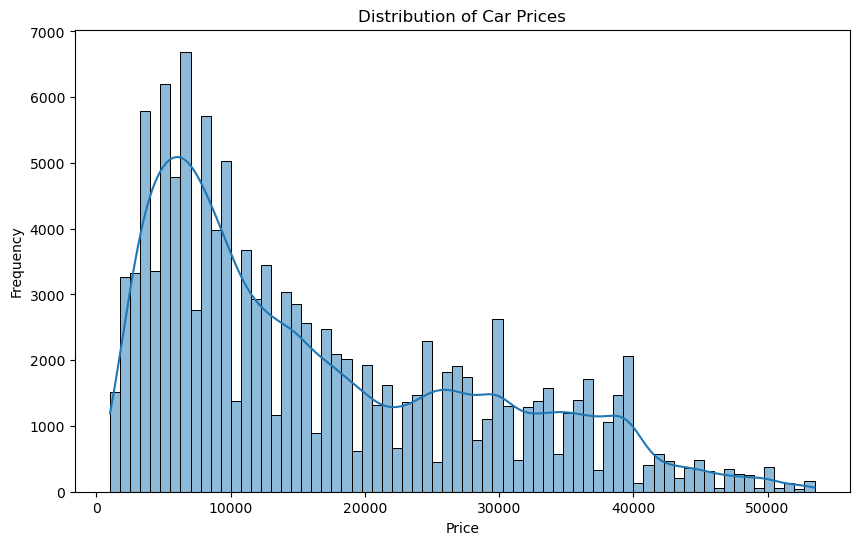

In [368]:
# Lets see how the car prices are distributed
plt.figure(figsize=(10, 6))
sns.histplot(newVehicleDf['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [369]:
#Convert year column to age column instead
curr_year = datetime.datetime.now().year
newVehicleDf['age'] = curr_year - newVehicleDf['year']
newVehicleDf.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
27,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,10.0
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,14.0
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al,4.0
30,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al,7.0
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,11.0


In [370]:
#Create new copy for only using INT columns
encodedVehicleDf = newVehicleDf.copy()

In [371]:
#Now we start encoding
#ordinal encodeing for condition/Size/title_status
#Condition

condCat = ['salvage', 'fair', 'good', 'like new', 'excellent', 'new']
condEncoder = OrdinalEncoder(categories=[condCat])
encodedVehicleDf['conditionInt'] = condEncoder.fit_transform(newVehicleDf[['condition']])

#title_status
titleCat = ['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']
titleEncoder = OrdinalEncoder(categories=[titleCat])
encodedVehicleDf['title_statusInt'] = titleEncoder.fit_transform(newVehicleDf[['title_status']])


encodedVehicleDf.sample()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age,conditionInt,title_statusInt
200248,35900,2017.0,ford,excellent,6 cylinders,gas,37000.0,clean,automatic,4wd,pickup,blue,mi,7.0,4.0,5.0


In [372]:
#Label encode columns fuel, cylinder, transmission, paint_color, manufacturer, state
EncodeColumns = ['fuel', 'cylinders', 'transmission', 'manufacturer', 'state', 'drive', 'paint_color', 'type']
encoder = LabelEncoder()
for col in EncodeColumns:
    newColName = f'{col}Int'
    encodedVehicleDf[newColName] = encoder.fit_transform(newVehicleDf[col])


encodedVehicleDf.drop(EncodeColumns, axis=1, inplace=True)
encodedVehicleDf.drop(['condition', 'title_status', 'year'], axis=1, inplace=True)
encodedVehicleDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123149 entries, 27 to 426878
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            123149 non-null  int64  
 1   odometer         123149 non-null  float64
 2   age              123149 non-null  float64
 3   conditionInt     123149 non-null  float64
 4   title_statusInt  123149 non-null  float64
 5   fuelInt          123149 non-null  int64  
 6   cylindersInt     123149 non-null  int64  
 7   transmissionInt  123149 non-null  int64  
 8   manufacturerInt  123149 non-null  int64  
 9   stateInt         123149 non-null  int64  
 10  driveInt         123149 non-null  int64  
 11  paint_colorInt   123149 non-null  int64  
 12  typeInt          123149 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 13.2 MB


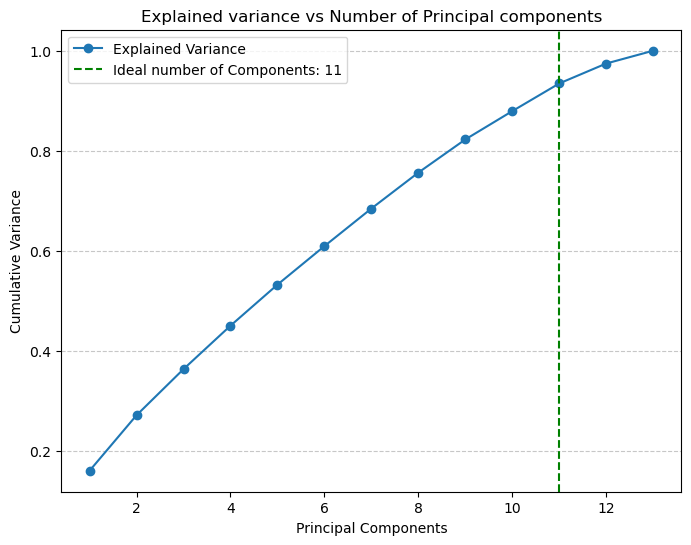

Number of components to keep: 11


In [373]:
# Running PCA for idea feature selection

numeric_data = encodedVehicleDf.select_dtypes(include=[np.number])
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#initialize PCA and fit data
pca = PCA()
pca.fit(scaled_data)
cum_var =  np.cumsum(pca.explained_variance_ratio_)

#plot the explained variance
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(range(1, len(cum_var) + 1), cum_var, '-o', label='Explained Variance')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Cumulative Variance')
ax1.set_title('Explained variance vs Number of Principal components')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
threshold = 0.90
n_components = np.argmax(cum_var >= threshold) + 1
ax1.axvline(x=n_components, color='green', linestyle='--', label=f'Ideal number of Components: {n_components}')
ax1.legend()
plt.show()

print(f"Number of components to keep: {n_components}")

In [374]:
#Based on the PCA and the correlation heatmap , dropping transmission column 
encodedVehicleDf.drop('transmissionInt', axis=1, inplace=True)

In [375]:
#Summary of Data preperation
    # Drop unneccessary columns
    # Identify outliers and eliminate
    # Fill missing values with mode/mean
    # Drop NaNs that can not be filled
    # Create age columns instead of year
encodedVehicleDf.sample()

,price,odometer,age,conditionInt,title_statusInt,fuelInt,cylindersInt,manufacturerInt,stateInt,driveInt,paint_colorInt,typeInt
214501,6200,84000.0,16.0,2.0,5.0,2,3,16,23,1,2,9


### Data Visualiztion

After our initial exploration and fine tuning the data, Let do a univariate and bivariate plotting of some columns to further identify patterns and any anomolies. 


Pairplot for numerical variables:


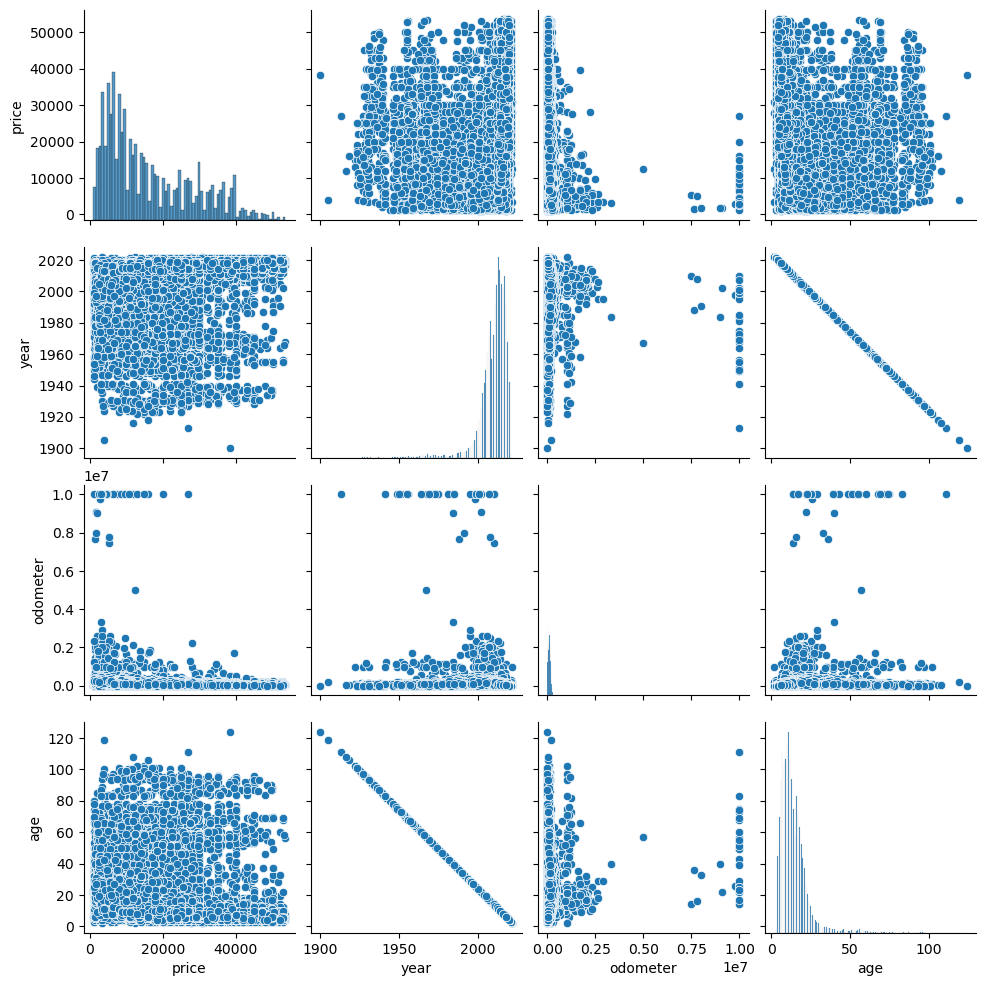

In [376]:
# Pairplot for numerical deatures
print("\nPairplot for numerical variables:")
sns.pairplot(newVehicleDf)
plt.show()

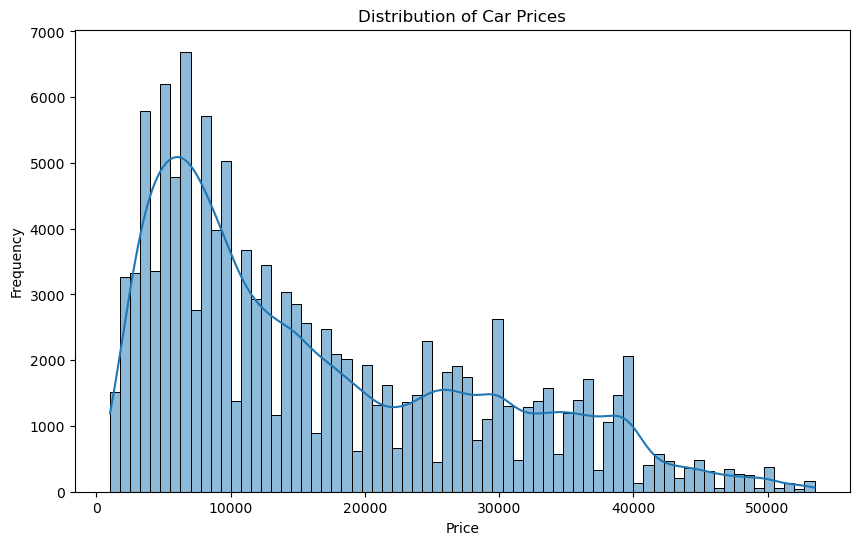

In [377]:
# Lets see how the car prices are distributed
plt.figure(figsize=(10, 6))
sns.histplot(newVehicleDf['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

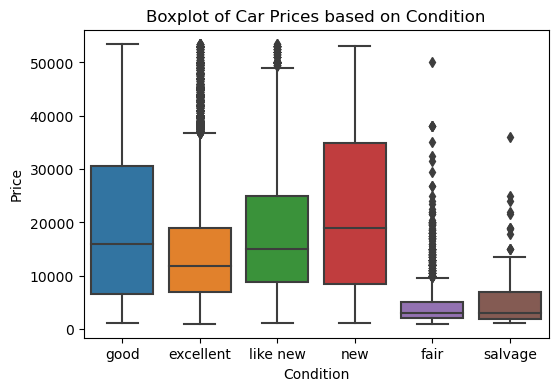

In [378]:
# Boxplot of car prices based on car condition
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

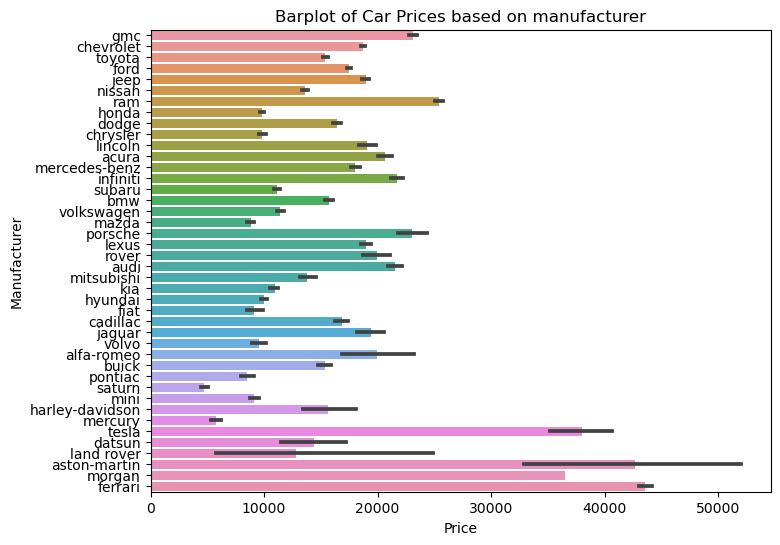

In [379]:
# Barplot of car prices based on car manufacturer
plt.figure(figsize=(8, 6))
sns.barplot(y='manufacturer', x='price', data=newVehicleDf)
plt.title('Barplot of Car Prices based on manufacturer')
plt.ylabel('Manufacturer')
plt.xlabel('Price')
plt.show()

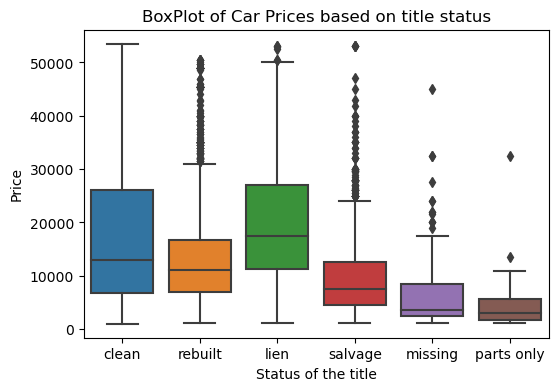

In [380]:
# BoxPlot of car prices based on title status
plt.figure(figsize=(6, 4))
sns.boxplot(x='title_status', y='price', data=newVehicleDf)
plt.title('BoxPlot of Car Prices based on title status')
plt.xlabel('Status of the title')
plt.ylabel('Price')
plt.show()

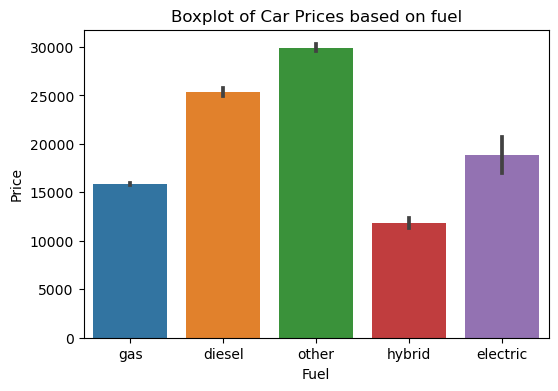

In [381]:
# Barplot of car prices based on Fuel
plt.figure(figsize=(6, 4))
sns.barplot(x='fuel', y='price', data=newVehicleDf)
plt.title('Boxplot of Car Prices based on fuel')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()

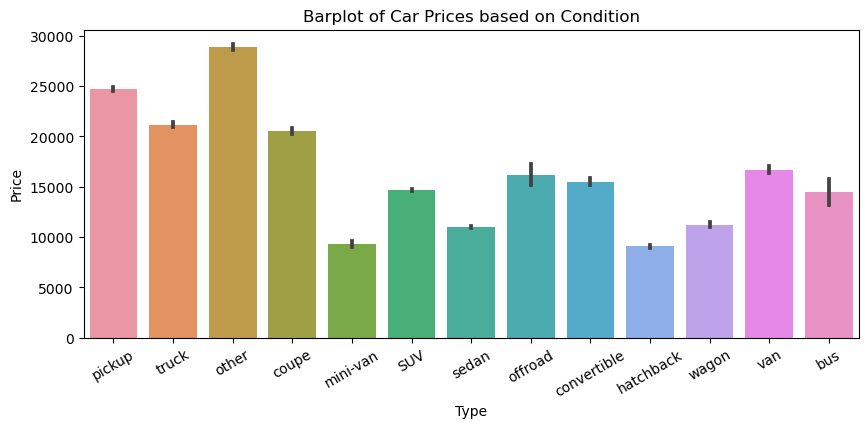

In [401]:
# Barplot of car prices based on car Type
plt.figure(figsize=(10, 4))
sns.barplot(x='type', y='price', data=newVehicleDf)
plt.title('Barplot of Car Prices based on Condition')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.show()

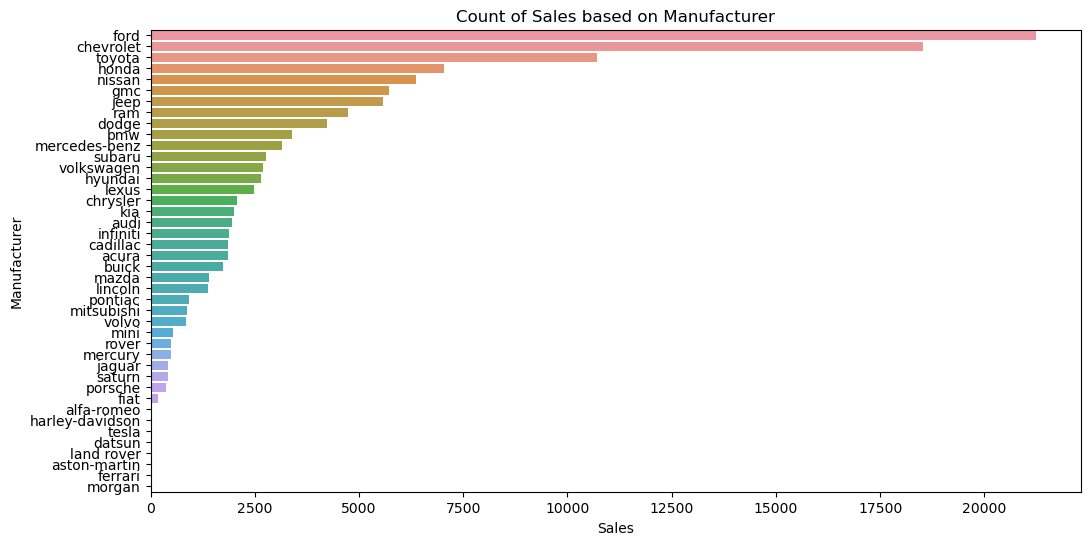

In [383]:
# Bar plot of all Manufacturer Sales
plt.figure(figsize=(12, 6))
sns.countplot(y='manufacturer', data=newVehicleDf, order=newVehicleDf['manufacturer'].value_counts().index)
plt.title('Count of Sales based on Manufacturer')
plt.xlabel('Sales')
plt.ylabel('Manufacturer')
plt.show()

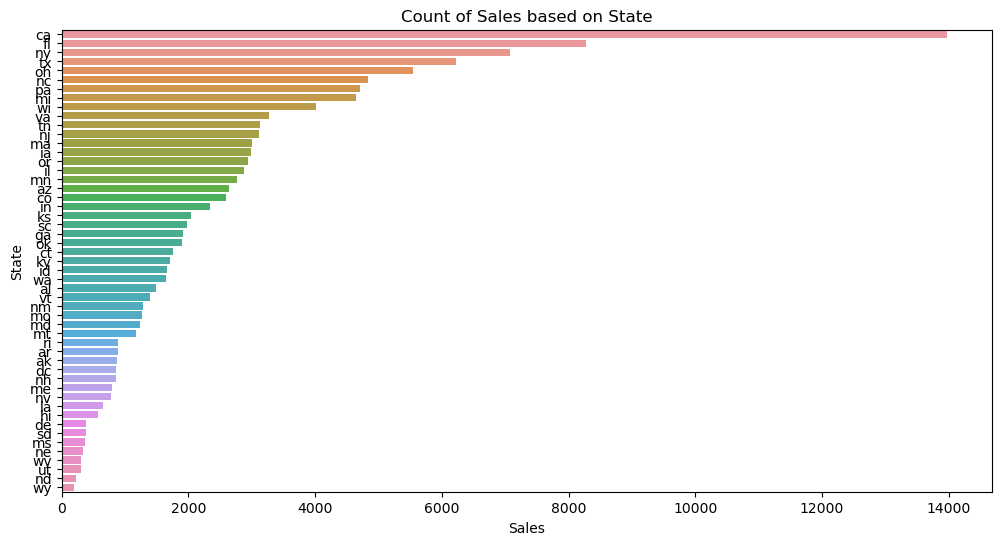

In [384]:
# Bar plot of all Statewise Sales
plt.figure(figsize=(12, 6))
sns.countplot(y='state', data=newVehicleDf, order=newVehicleDf['state'].value_counts().index)
plt.title('Count of Sales based on State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

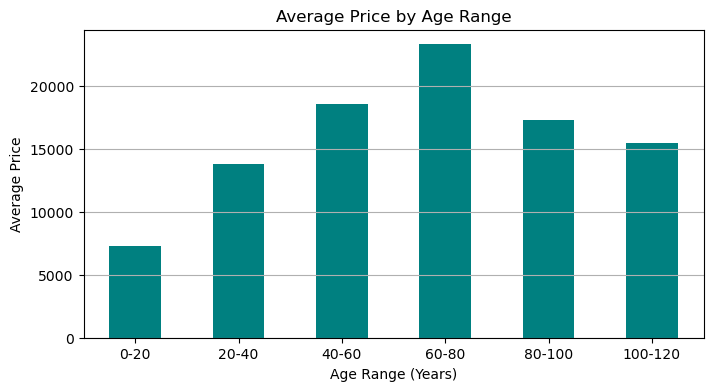

In [385]:
#Bar Plot for age range vs average price
bins = [20, 40, 60, 80, 100, 110, 120] 

# Bin the 'age' column into age ranges and calculate avg price
newVehicleDf['age_range'] = pd.cut(newVehicleDf['age'], bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100', '100-120'])
avg_price_by_age_range = newVehicleDf.groupby('age_range')['price'].mean()

# Plot age range vs average price
plt.figure(figsize=(8, 4))
avg_price_by_age_range.plot(kind='bar', color='teal')
plt.title('Average Price by Age Range')
plt.xlabel('Age Range (Years)')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()
#drop the new column created.
newVehicleDf.drop(columns = ['age_range'], axis=1, inplace=True)

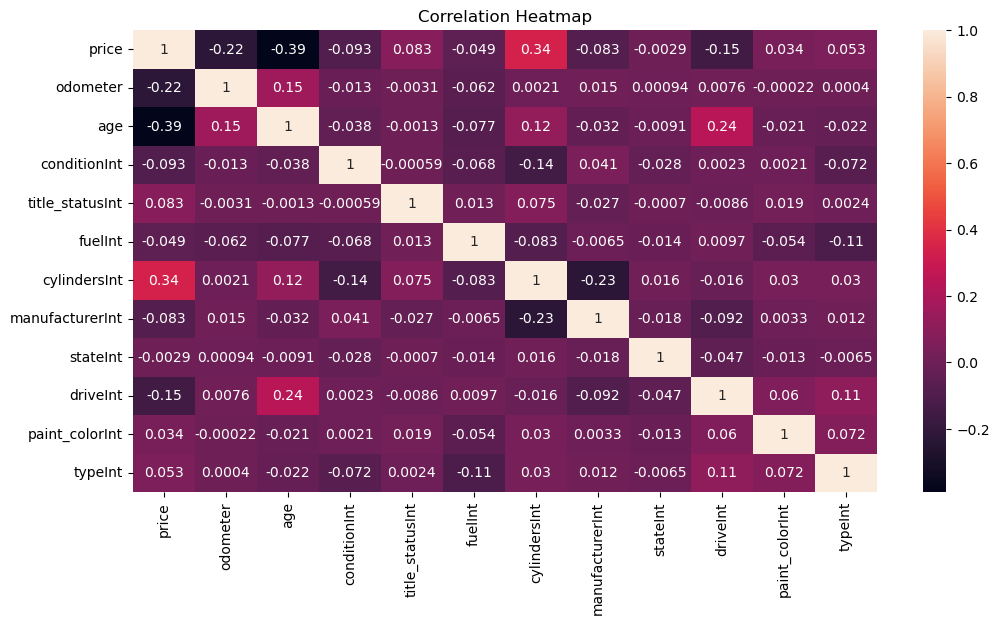

In [386]:
# Heatmap plot on encodedData correlation
plt.figure(figsize=(12, 6))
sns.heatmap(encodedVehicleDf.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [387]:
#This would be common for both RFR and Ridge
X = encodedVehicleDf.drop('price', axis=1)
y = encodedVehicleDf['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [388]:
#Running RandomForestRegressor on LabelEncoded data

# Define the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('rf', RandomForestRegressor())  # Random Forest Regressor
])

# Define hyperparameters for grid search
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
}

# Perform grid search and extarct feature importance
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
rf_grid_search.fit(X_train, y_train)

# Get the best model
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)

#create a Dataframe for columns vs their feature imporance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns.values,
    'Importance': rf_best_model.named_steps['rf'].feature_importances_
})
# Sort the DataFrame by importance values
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df

/Users/paloorka/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=30, n_estimators=300))])


,Feature,Importance
1,age,0.466485
5,cylindersInt,0.186807
0,odometer,0.157517
4,fuelInt,0.040162
6,manufacturerInt,0.038360
8,driveInt,0.029290
10,typeInt,0.024557
7,stateInt,0.018880
2,conditionInt,0.016084
9,paint_colorInt,0.015703


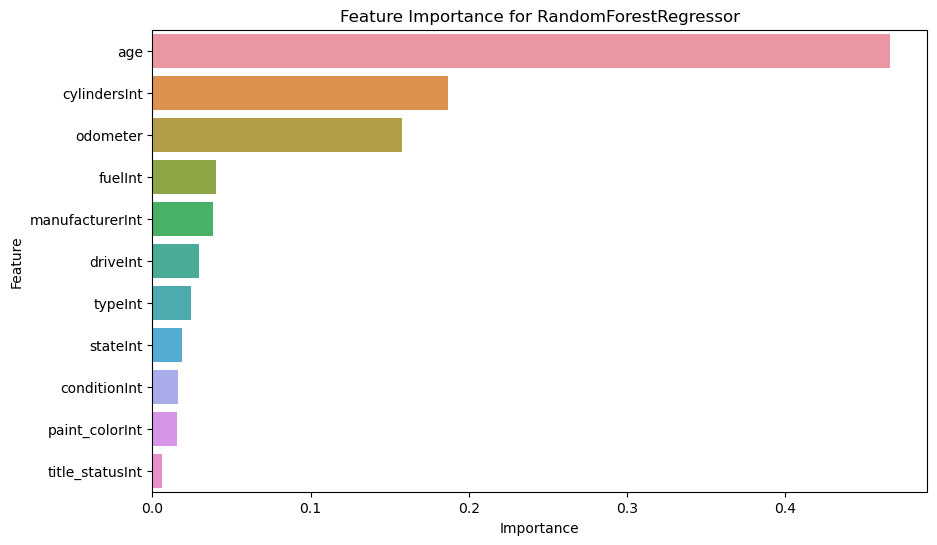

In [389]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(rf_feature_importance_df, y= 'Feature', x= 'Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

In [390]:
#Accuuracy of RandomForestRegressor predictions
rf_best_model
train_preds = rf_best_model.predict(X_train)
test_preds = rf_best_model.predict(X_test)
rf_train_mae = mean_absolute_error(y_train, train_preds)
rf_test_mae = mean_absolute_error(y_test, test_preds)
rf_train_r2 = r2_score(y_train, train_preds)
rf_test_r2 = r2_score(y_test, test_preds)
rf_mean_time = rf_grid_search.cv_results_['mean_fit_time'].mean()

print(f'Random Forest Regressor Train MAE: {rf_test_mae}')
print(f'Random Forest Regressor Test MAE: {rf_train_mae}')

print(f'Random Forest Regressor Train R2score: {rf_train_r2}')
print(f'Random Forest Regressor Test R2score: {rf_test_r2}')

Random Forest Regressor Train MAE: 1888.0288833343413
Random Forest Regressor Test MAE: 705.6820921672585
Random Forest Regressor Train R2score: 0.988719177949619
Random Forest Regressor Test R2score: 0.9199402182559467


In [391]:
#Running Ridge on LabelEncoded data

# Define the pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('ridge', Ridge())  # Random Forest Regressor
])

# Define hyperparameters for grid search
ridge_param_grid = {
    'ridge__alpha':  [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform grid search and extarct feature coefficients.
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
ridge_grid_search.fit(X_train, y_train)

# Get the best model
ridge_best_model = ridge_grid_search.best_estimator_
print(ridge_best_model)

# Feature importance DataFrame
ridge_feature_importance_df = pd.DataFrame({
    'Feature': X.columns.values,
    'Importance': ridge_best_model.named_steps['ridge'].coef_
})

# Sort the DataFrame by importance values
ridge_feature_importance_df = ridge_feature_importance_df.sort_values(by='Importance', ascending=False)
ridge_feature_importance_df

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.001))])


,Feature,Importance
5,cylindersInt,4437.225675
3,title_statusInt,650.104923
10,typeInt,331.843082
9,paint_colorInt,131.767941
6,manufacturerInt,-110.354047
7,stateInt,-199.294960
8,driveInt,-615.600193
2,conditionInt,-703.790909
4,fuelInt,-749.791051
0,odometer,-2265.258207


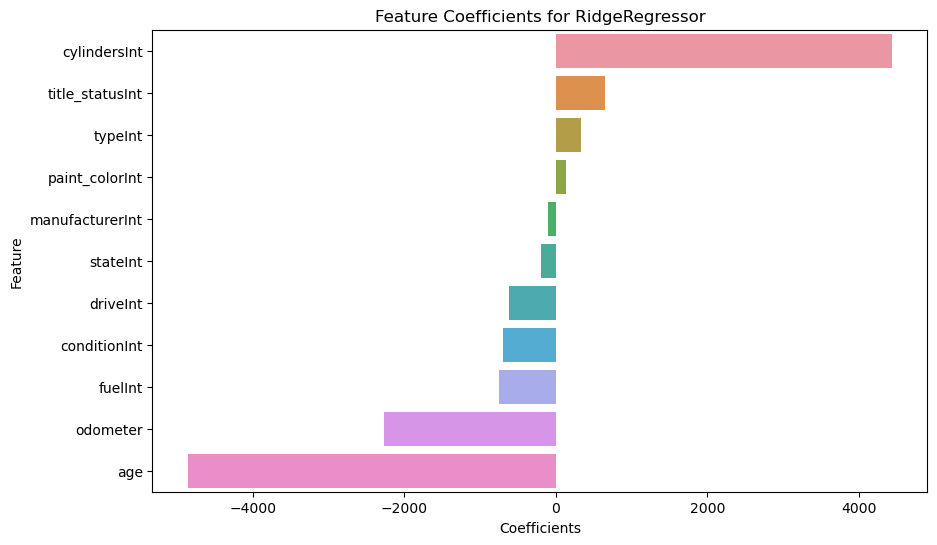

,Feature,Importance
5,cylindersInt,4437.225675
3,title_statusInt,650.104923
10,typeInt,331.843082
9,paint_colorInt,131.767941
6,manufacturerInt,-110.354047
7,stateInt,-199.294960
8,driveInt,-615.600193
2,conditionInt,-703.790909
4,fuelInt,-749.791051
0,odometer,-2265.258207


In [392]:
# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(ridge_feature_importance_df, y= 'Feature', x= 'Importance')
plt.xlabel('Coefficients')
plt.ylabel('Feature')
plt.title('Feature Coefficients for RidgeRegressor')
plt.show()
ridge_feature_importance_df

In [393]:
#Accuuracy of RidgeRegressor predictions
train_preds = ridge_best_model.predict(X_train)
test_preds = ridge_best_model.predict(X_test)

ridge_train_mae = mean_absolute_error(y_train, train_preds)
ridge_test_mae = mean_absolute_error(y_test, test_preds)
ridge_train_r2 = r2_score(y_train, train_preds)
ridge_test_r2 = r2_score(y_test, test_preds)
ridge_mean_time = ridge_grid_search.cv_results_['mean_fit_time'].mean()

print(f'Ridge Regressor Train MAE: {ridge_train_mae}')
print(f'Ridge Regressor Test MAE: {ridge_test_mae}')
print(f'Ridge RegressorTrain R2score: {ridge_train_r2}')
print(f'Ridge Regressor Test R2score: {ridge_test_r2}')

Ridge Regressor Train MAE: 7471.076743651454
Ridge Regressor Test MAE: 7502.84978552732
Ridge RegressorTrain R2score: 0.3498913555072214
Ridge Regressor Test R2score: 0.3267480862385418


In [394]:
#Create DF for all performance parameters for the models
crossDf = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Ridge'],
    'Train MAE' : [rf_train_mae, ridge_train_mae],
    'Test MAE' : [rf_test_mae, ridge_test_mae],
    'Train R2score' :[rf_train_r2, ridge_train_r2],
    'Test R2score' : [rf_test_r2, ridge_test_r2],
    'Mean Fit Time(s)' : [rf_mean_time, ridge_mean_time]
})
crossDf

,Model,Train MAE,Test MAE,Train R2score,Test R2score,Mean Fit Time(s)
0,Random Forest Regressor,705.682092,1888.028883,0.988719,0.919940,76.981096
1,Ridge,7471.076744,7502.849786,0.349891,0.326748,0.038215


In [395]:
#Perfomce permutation importance with Ridge model
ridge_perm_importance_pi = permutation_importance(ridge_grid_search, X_test, y_test, n_repeats=30, random_state=42)
ridge_pi_feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': ridge_perm_importance_pi.importances_mean})
ridge_pi_feature_importance

,Feature,Importance
0,odometer,493.755647
1,age,2079.026689
2,conditionInt,83.525798
3,title_statusInt,47.208519
4,fuelInt,28.598304
5,cylindersInt,1746.335614
6,manufacturerInt,4.180658
7,stateInt,2.884341
8,driveInt,59.833588
9,paint_colorInt,2.183037


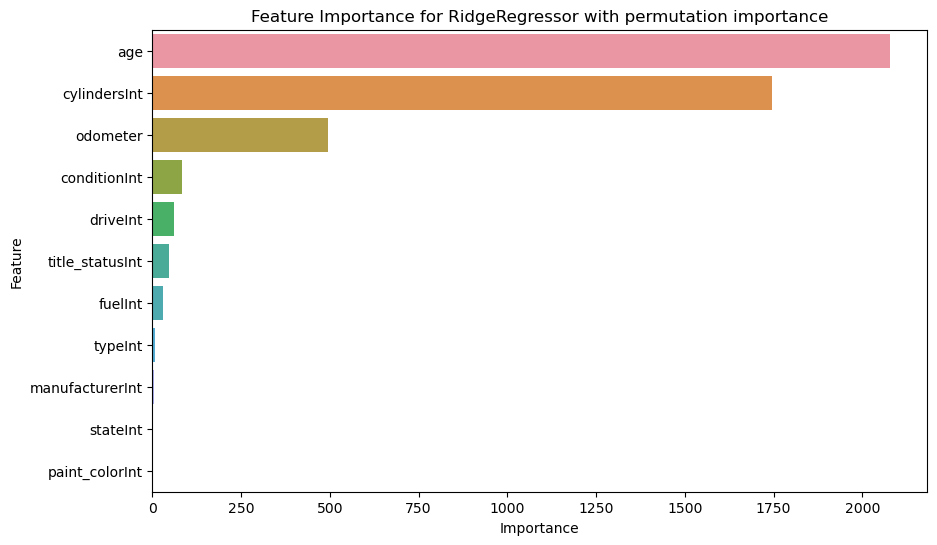

In [396]:
# Sort the DataFrame by importance values
ridge_pi_feature_importance = ridge_pi_feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(ridge_pi_feature_importance, y= 'Feature', x= 'Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RidgeRegressor with permutation importance')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
 """
    5.1 Model performance
        -   Use the best_model from the above steps to predict both test and train data
        -   Calculate MAE and R2_score for both the model fits.
        -   Identify the mean fit time
        -   Create a dataframe to analyze the model performance parameters.
        -   Plot the graphs for permutation importance as well as Ridge Coefficients
        -   Visually analyzed the best parameters and their relation to price of a car
    
    5.2 Iterative Improvement
        -   Based on the re-runs of above changes were made to model
            -   Reduction of the missing samples with NaN to avoid extremely large fit time in RFR
            -   Tried similar with one-hot encoding which yeilds different results.
            -   odometer has some anamolies in the data which needs to be revisited. 
            -   paint_color and state did not contribute to the results. This may be omitted

    5.3 Results
        -   Model Perfomance
            -   Model	                    Train MAE	    Test MAE	    Train R2score	Test R2score	Mean Fit Time(s)
                Random Forest Regressor	    805.771712	    2137.714188	    0.974943	    0.825361	    41.595156
                Ridge Regressor             5554.757488	    5579.939311	    0.222090	    0.231759	    0.031755
        -   Top 5 important features from Random Forest Regressor
            -   Age,  cylinder, odometer, manufacturer, fuel
        -   Top 5 important features from Ridge Regressor
            -   Age, cylinder, condition, fuel, odometer
        - Positive coefficients for Ridge 
            - cylinder, condition, type,
        - Negative coefficients for Ridge 
            -   Age, Fuel, odometer
"""

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
"""
    6.1 Overview
        As a used car dealer looking to fine-tune your inventory pricing strategy, understanding the factors that positively and negatively 
        impact pricing is crucial for maximizing profitability and optimizing sales. 
        By analyzing the vehicle dataset with over 400k entries here are some insights into these factors and some suggestions for further steps you can take to
        increase the sales, have optimal inventory and adjust pricing based on market data.

    6.2 Positive Factors Impacting Pricing
        1.  Brand and Model: Popular and reputable brands/models such as ashton-martin, alpha romeo and so on tend to have higher resale values. 
            You could focus on stocking sought-after brands and models to attract customers willing to pay premium prices. Moreover, Also consider having models
            that have highest sales over years such as ford, toyota honda these have good resale values and less maintenance cost  needed.
        2.  Condition: Well-maintained cars with a clean service history and minimal wear and tear typically command higher prices. 
            You could invest in reconditioning and detailing services to improve the overall condition of your inventory.
        3.  Age: Age works in both positive and negative category. Vintage car market affects the affluent buyers making it ideal for high profitability and 
            higher sale prices. Identify if your region has this type of buyers and accordingly maintain the inventory and pricing.
        4.  Cylinders: Higher cylinders often result in better performance, acceleration, more fuel consumption. These type of cars generally listed in
            sports category. Affluent customers often tend to go for such cars. Common customers are attracted to these cars so if you have more inventory, 
            you can highly price it and attract both common and affluent customers.

    6.3 Negative Factors Impacting Pricing
        1.  Mileage: Higher mileage/odometer reading is generally associated with increased wear and decreased value. 
            You could consider pricing older non-branded vehicles with high mileage more competitively to account for potential maintenance costs.
        2.  Age: Similar to odometer reading, age of the vehicle can impact the pricing. Most customers tend to spend more on a new car than willing to spend
            same for an older car though the milage is lesser. One of the main reason being outdated features.
        3.  Fuel: Not having diverse car types may also effect customer base. People are willing to pay a lot for electric cars these days. You could advertise and
            maintain the stock of electric cars along with gas and diesel, to provide better options.

    6.4 Actions to take
        1.  Conduct Market Research: Analyze market trends and competitor pricing to ensure your inventory is priced competitively.
        2.  Optimize Inventory Mix: Focus on stocking popular brands, models, and features that align with customer preferences and market demand.
        3.  Invest in Reconditioning: Prioritize reconditioning efforts to improve the condition and appeal of your inventory, thereby justifying higher prices.
        4.  Transparency and Customer Service: Build trust with customers by providing transparent information about your inventory's condition, history, and pricing rationale. 
            Offer exceptional customer service to differentiate yourself from competitors.

    6.5 Summary
        By leveraging these insights and taking proactive steps to optimize your inventory pricing strategy, you can enhance your competitiveness, 
        attract more customers, and maximize profitability in the used car market.
"""